In [1]:
import dataprocesing as dp
import importlib

In [2]:
datapath_fullmove = r"C:\Users\gmultimedia.PJATK8\Desktop\PJATK_K\2020-08-06-B0445-S01-E02-T05.c3d"

In [3]:
from pyomeca import Analogs
def read_analog_allmuscles(datapath):
    muscles = ["Voltage.1","Voltage.2","Voltage.3","Voltage.4","Voltage.5","Voltage.6","Voltage.7","Voltage.8","Voltage.9","Voltage.10","Voltage.11","Voltage.12","Voltage.13","Voltage.14","Voltage.15","Voltage.16"]
    emg = Analogs.from_c3d(datapath, usecols=muscles)
    return emg

In [4]:
emg_data = read_analog_allmuscles(datapath_fullmove)

In [5]:
def rename_emg(emg):
    muscles_names = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    emg['channel'] = muscles_names
    return emg

In [6]:
emg_renamed = rename_emg(emg_data)

In [7]:
def show_emg_data(emg_processed):
    emg_processed.plot(x="time", col="channel", col_wrap=3)

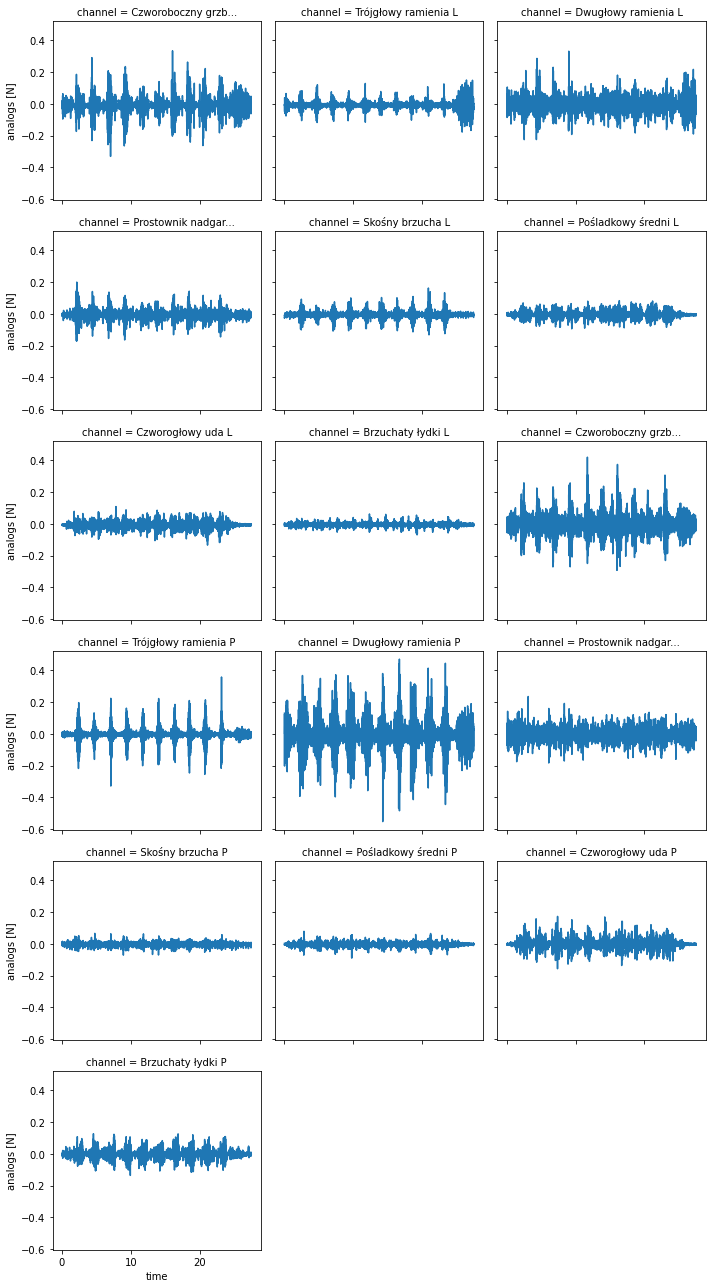

In [8]:
show_emg_data(emg_data)

In [9]:
def normalize_emg(emg):
    emg_p = (
    emg.meca.band_pass(order=2, cutoff=[10, 425])
    .meca.center()
    .meca.abs()
    .meca.low_pass(order=4, cutoff=5, freq=emg.rate)
    .meca.normalize(ref=None, scale=1)
    )
    return emg_p 

In [10]:
normalised_emg=normalize_emg(emg_renamed)

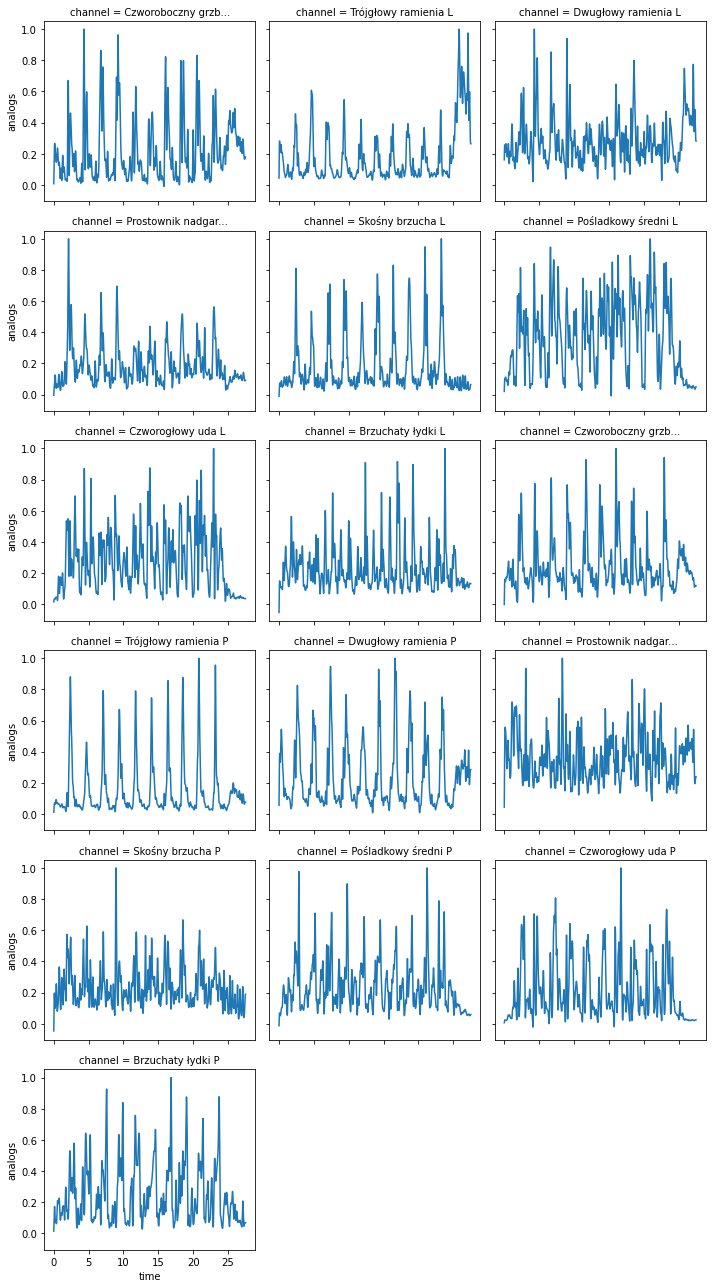

In [13]:
show_emg_data(normalised_emg)

In [11]:
def emg_full_preproces(datapath):
    emg_data = read_analog_allmuscles(datapath)
    normalised_emg=normalize_emg(emg_data)
    return normalised_emg

Sprawdzamy wczytanie i przetworzenie pojedyńczej próbki emg

In [12]:
datapath_singlemove = r"Z:\baza\2020-08-05-B0444-S01-E01-T01-K1.c3d"

In [13]:
emg_single = emg_full_preproces(datapath_singlemove)

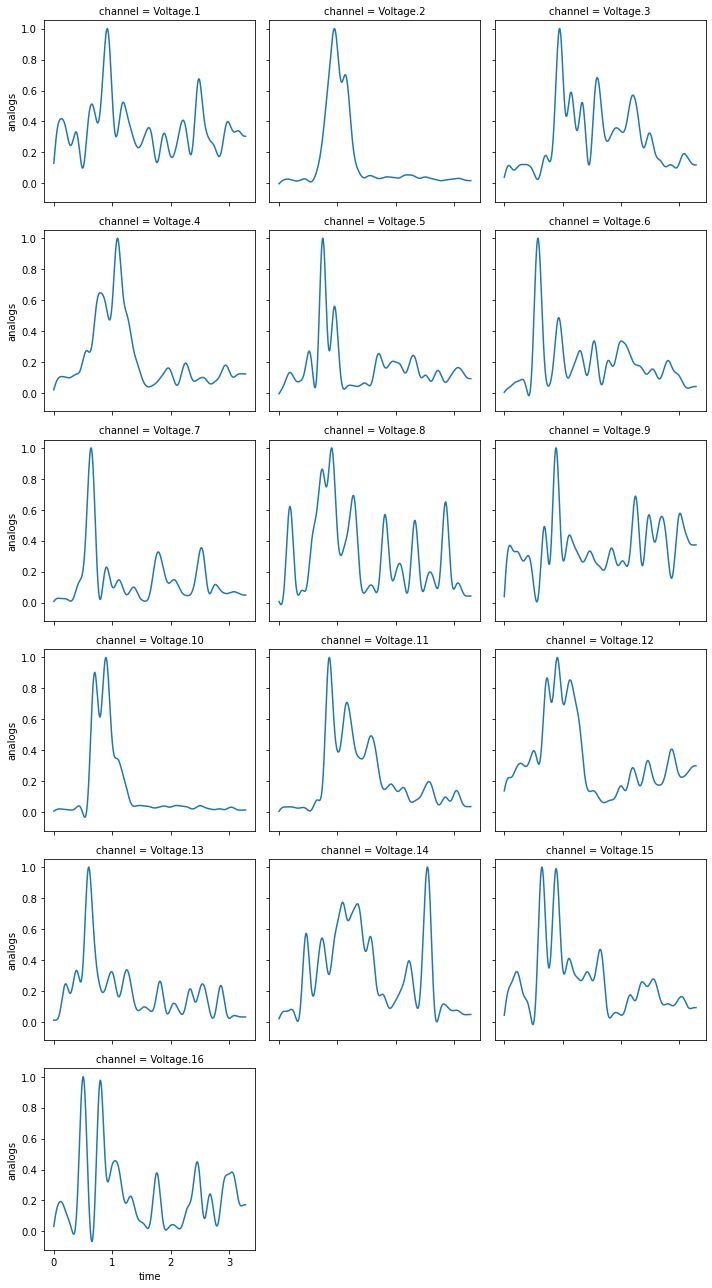

In [14]:
show_emg_data(emg_single)

In [15]:
import pandas as pd

In [18]:
def emg_todataframe(emg):
    df = emg.to_dataframe()
    return df

In [19]:
df = emg_todataframe(emg_single)

In [20]:
df

analogs
channel    time           
Voltage.1  0.000  0.130209
           0.001  0.134482
           0.002  0.138768
           0.003  0.143065
           0.004  0.147372
...                    ...
Voltage.16 3.280  0.172446
           3.281  0.172454
           3.282  0.172461
           3.283  0.172466
           3.284  0.172471

[52560 rows x 1 columns]

Oczekujemy czegoś innego takiego jak"

|  time | volage.1 | Voltage.2  |  ... |   |
|---|---|---|---|---|
| 1  |   |   |   |   |
| 2  |   |   |   |   |
| 3  |   |   |   |   |
| .... |   |   |   |   |

In [30]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import ezc3d

def show_events(data_path):
    """
    Na wejściu funkcji podajemy ścieżkę do pliku z pełnym nagraniem ruchu
    Funkcja wyświetla wykresy po lewej ruchy nałozone na siebbie w czasie
    Po prawej odczyt pełnej scieżki napieć mięsni w czasie
    """
    emg_processed = emg_full_preproces(data_path)
    p,d=dp.read_labels(data_path, 1000) # p - moment rozpoczecia eventu, d - momen zakończenia eventu
    print(p,d)
    for num in range(16):
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        for i in range(len(p)):             
            emg_processed_event=emg_processed[num][p[i]:d[i]]
            plt.plot(emg_processed_event)
        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.show()

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]


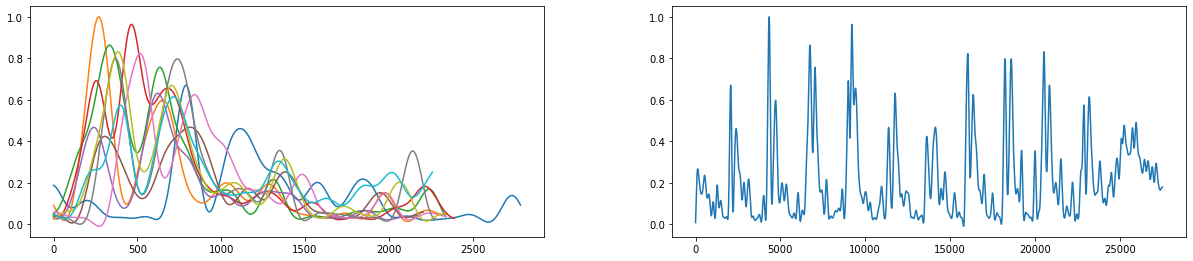

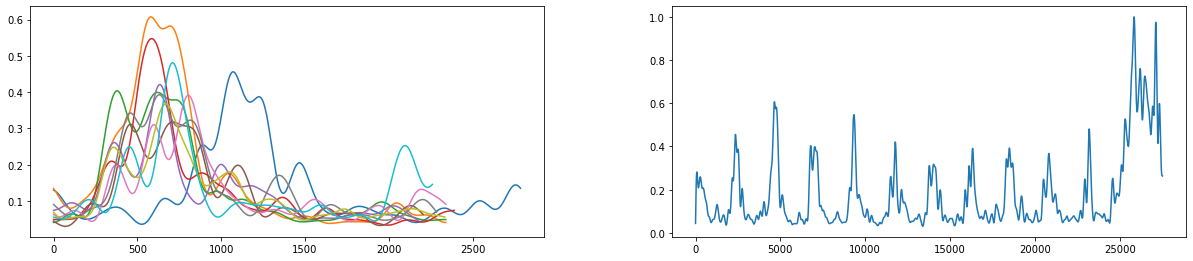

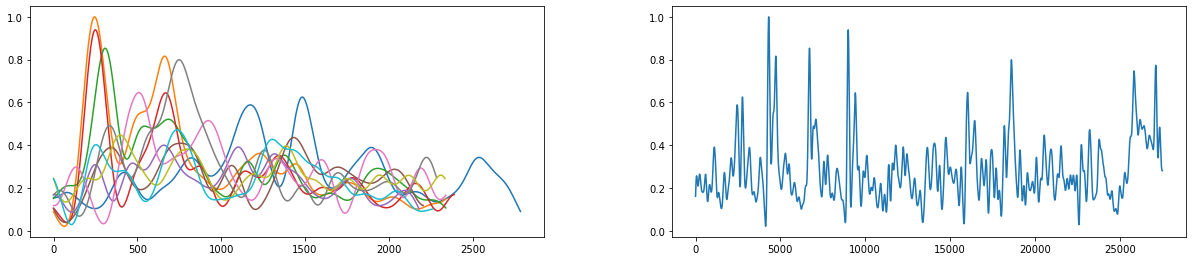

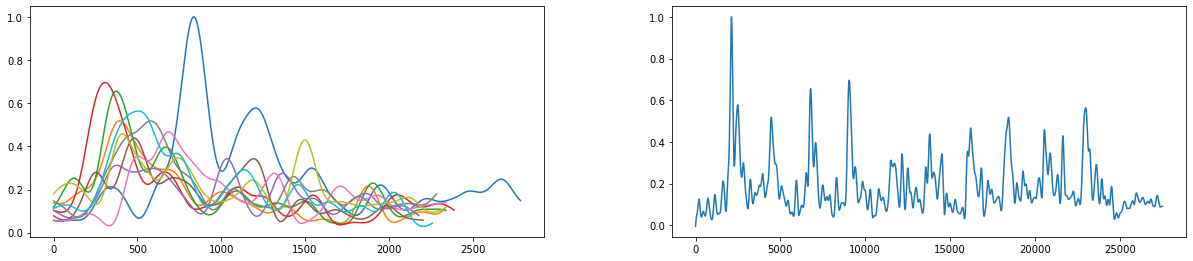

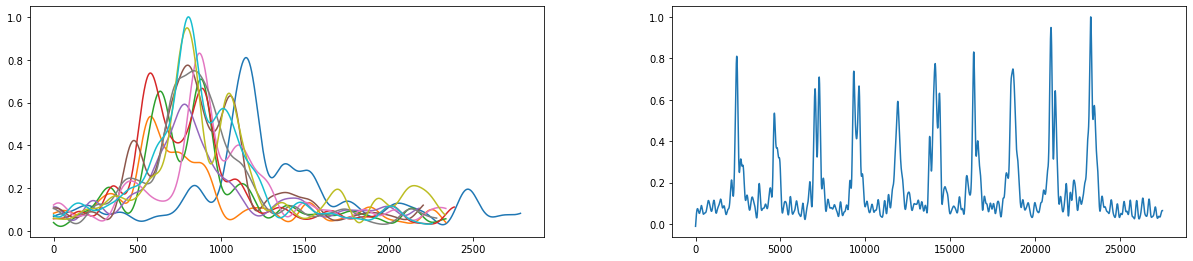

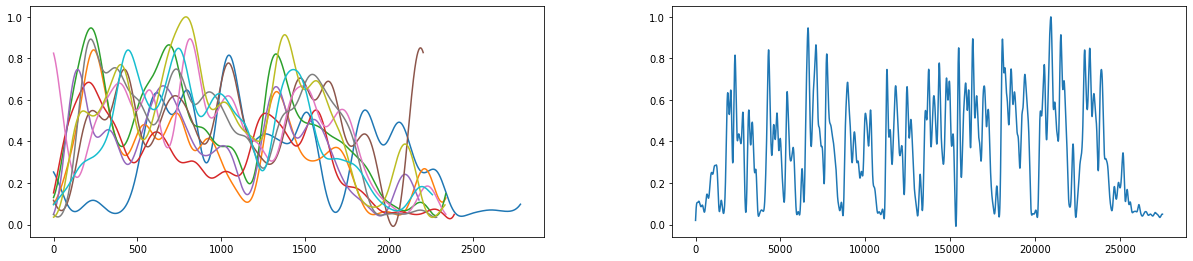

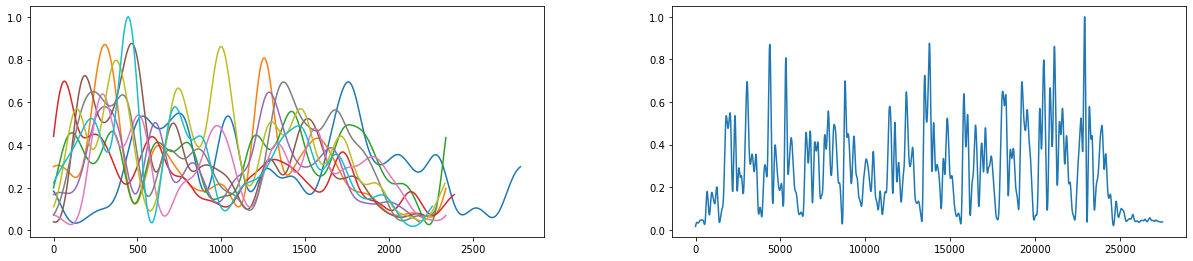

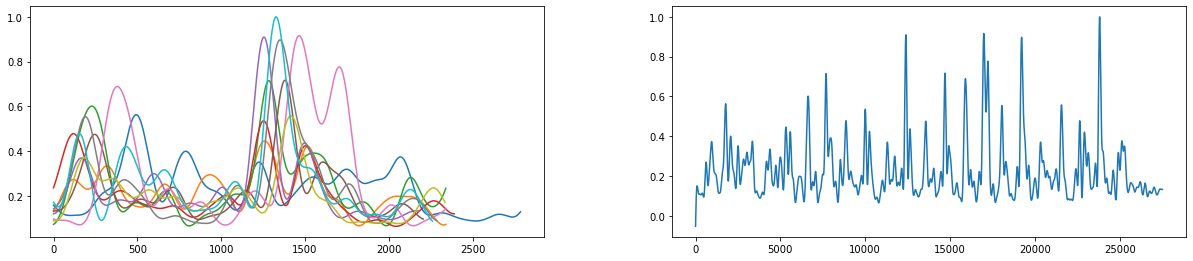

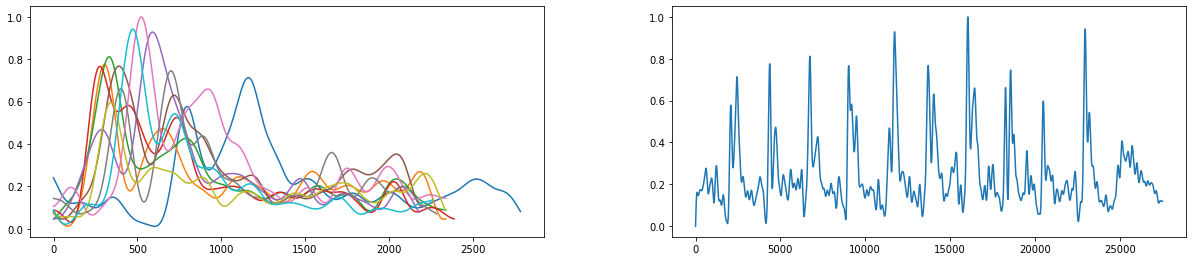

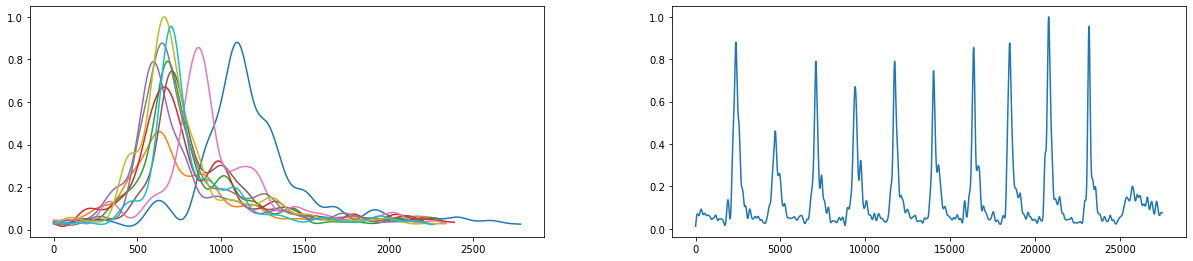

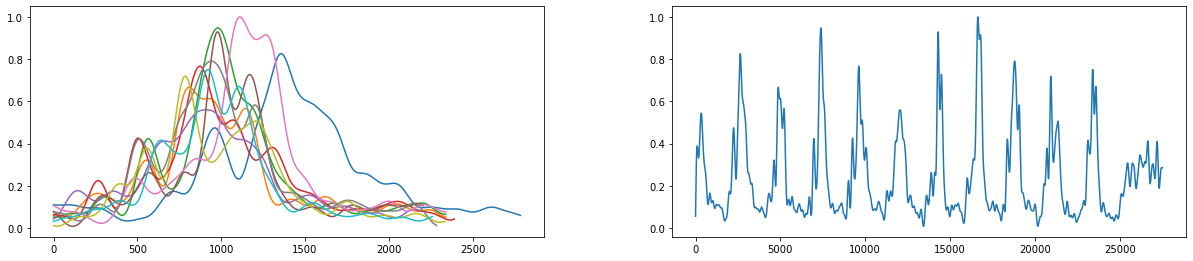

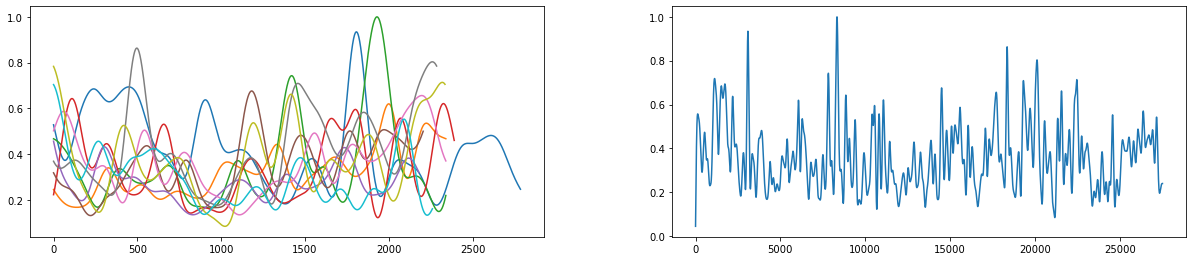

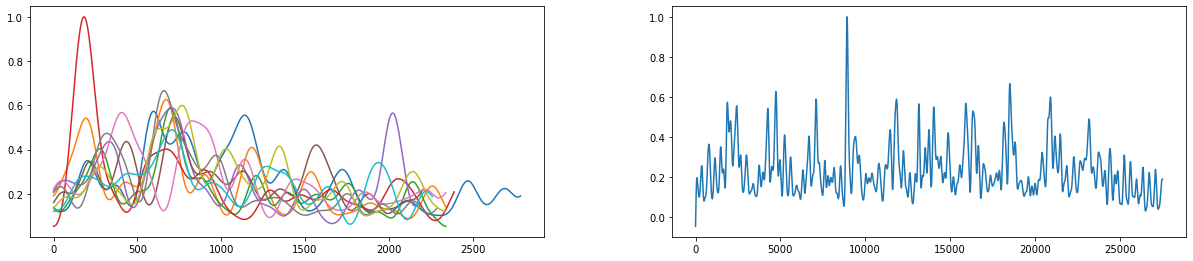

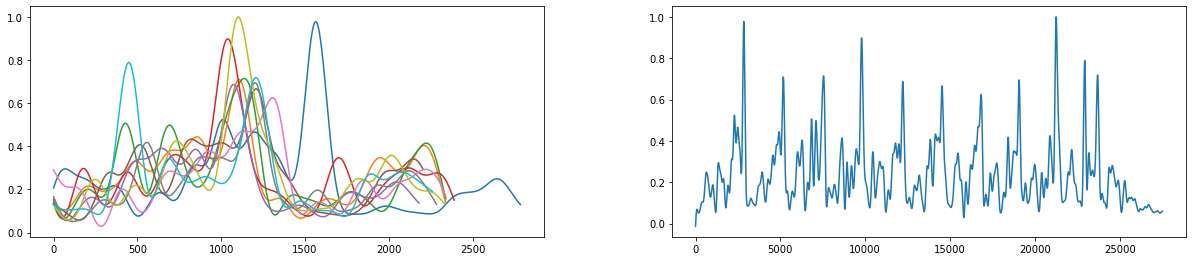

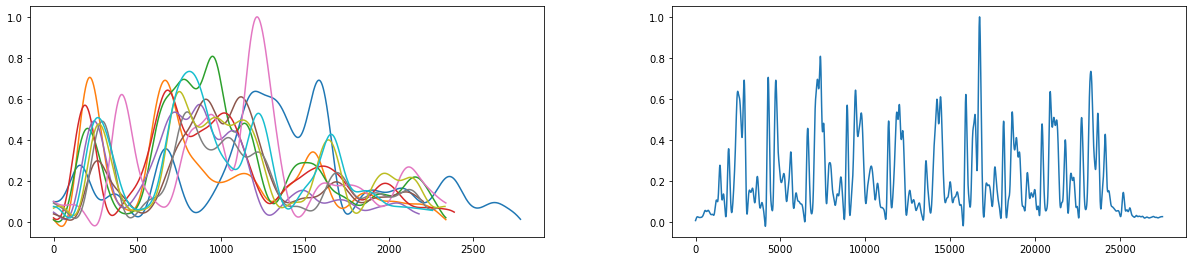

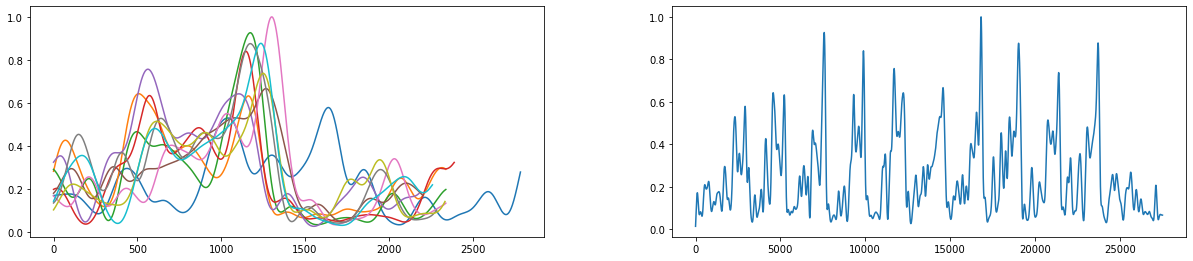

In [31]:
show_events(datapath_fullmove)

In [40]:
import glob
import numpy as np

def compare_events_average(folder_path, person, exer_num):
    """
    Funkcja wyświetlająca uśrednioną prace mięsni dla danego świczenia i aktora
    
    Input:
    - folder_path - ścieżka dostępu do folderu z wszystkimi nagraniami
    - person - Nazwa aktora do wczytania
    - exer_num - Nazwa ćwiczenia do wczytania
    
    Output:
    - Wykresy średnich przebiegów dla danego ćwiczenia
    
    """
    
    
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=emg_full_preproces(file)

        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        for num in range(16):

            for i in range(len(p)):


                emg_processed_event=emg_processed[num][p[i]:d[i]]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)

                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)

            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
            file_num=file_num+1;
        
    
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names2[num])
        plt.show()
    print(aver_arr_all)

Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T01.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T02.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T03.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T04.c3d
Z:\Miecz\\B0445\2020-08-06-B0445-S01\2020-08-06-B0445-S01-E01-T05.c3d


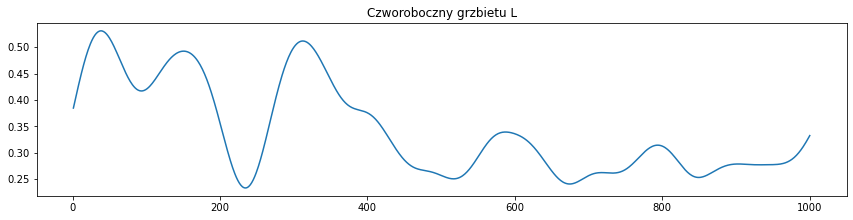

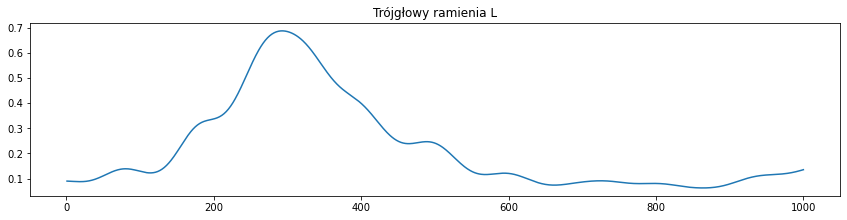

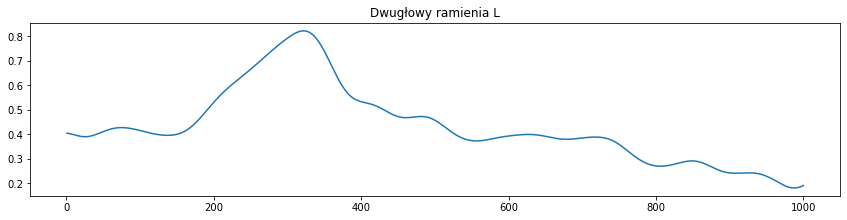

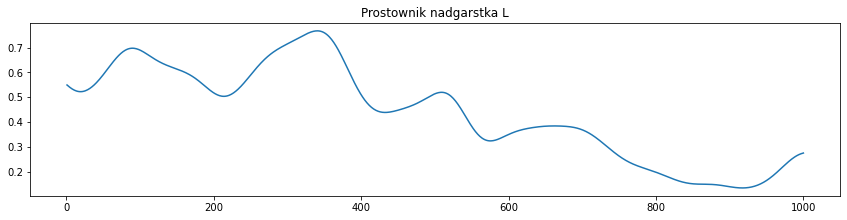

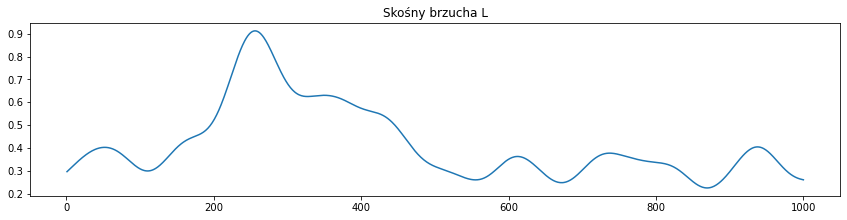

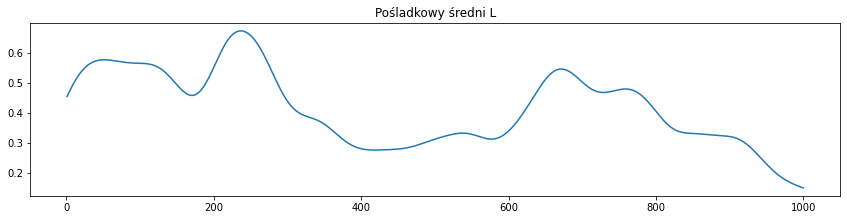

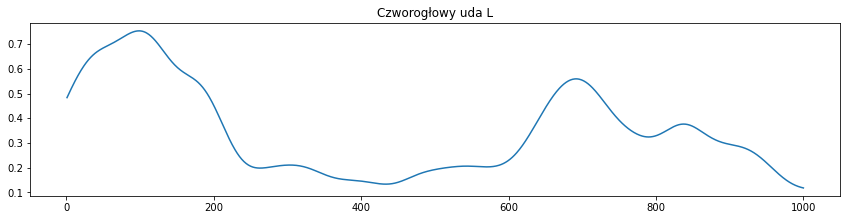

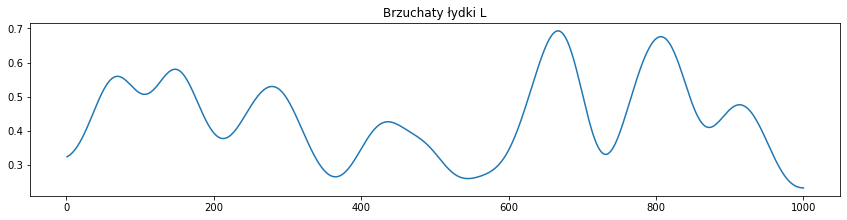

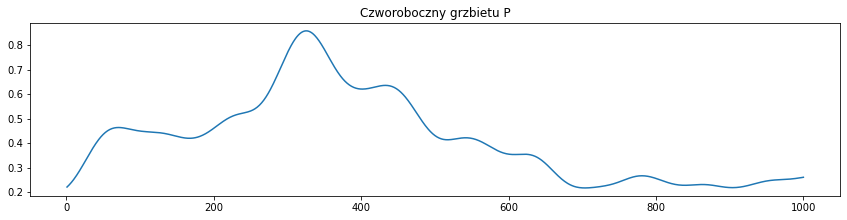

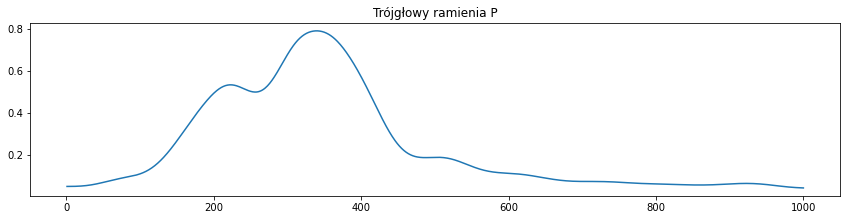

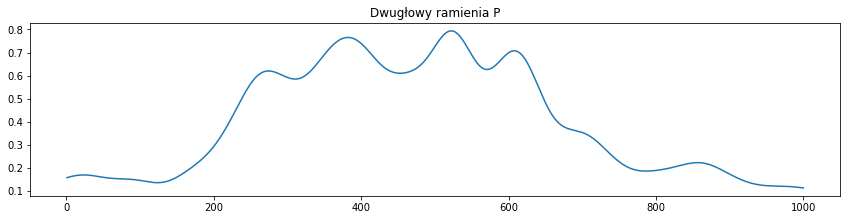

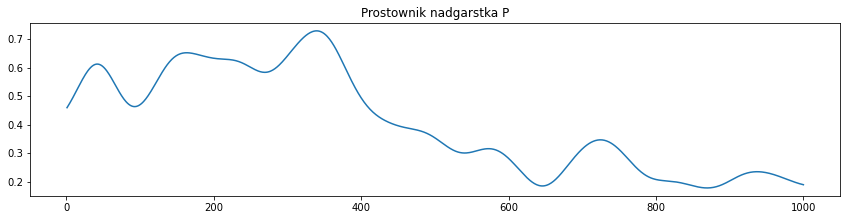

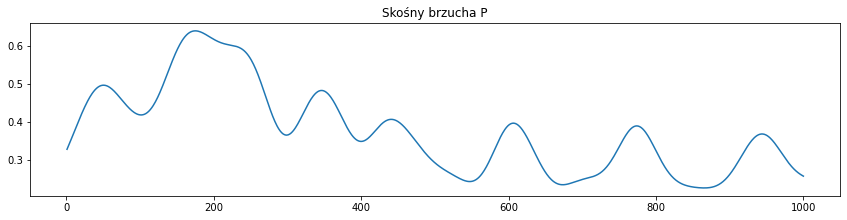

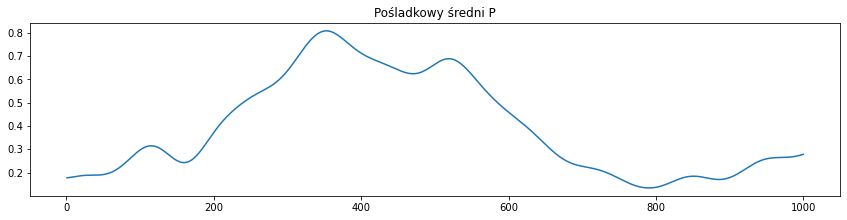

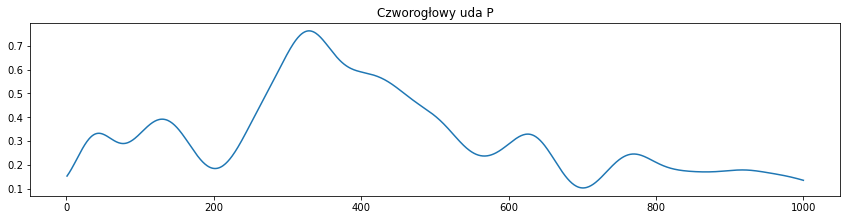

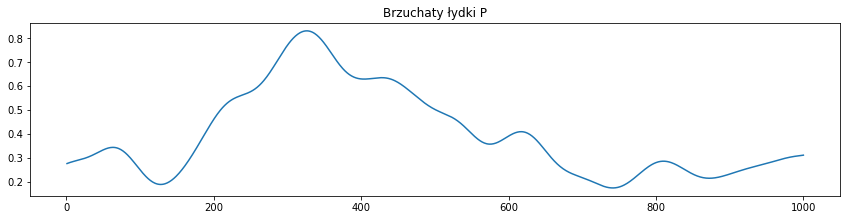

[[0.38490903 0.39122607 0.39752075 ... 0.32773032 0.33022077 0.33274656]
 [0.09034876 0.09024379 0.09012256 ... 0.1339119  0.13477016 0.13564325]
 [0.40497988 0.404626   0.40416963 ... 0.18841896 0.18975672 0.19119959]
 ...
 [0.17751004 0.1778682  0.17826729 ... 0.27661599 0.27757303 0.27856069]
 [0.15391557 0.15836634 0.16301192 ... 0.13782374 0.13695821 0.13608715]
 [0.27733379 0.27851485 0.2796436  ... 0.31147444 0.31189688 0.31233623]]


In [41]:
folder_path2=r"Z:\Miecz\\"
compare_events_average(folder_path2,"B0445", "1")

In [47]:
def nowy_czas(p,d,markers):
    ev=[p,d]
    s=np.zeros(len(ev[0]))
    k=np.zeros(len(ev[0]))
#liczymy rozniczkę dla każdego uderzenia (od eventu postawy początkowej do eventu postawy początkowej
    for i in range(len(ev[0])):
        #print(markers[ev[0][i]:ev[1][i]])
        output_difference=np.diff(markers[ev[0][i]:ev[1][i]])
        #plt.plot(output_difference)
        #print(output_difference)
        #ustalenie nowego startu i końca ruchu
        dz=max(output_difference)*0.2
        dx=min(output_difference)*0.9
        
		#s[i]=np.argmax(output_difference>dz)-40*5
        #k[i]=len(output_difference) - np.argmax(output_difference>dx)+40*5
        s[i]=np.argmax(output_difference>dz)
        k[i]=len(output_difference) - np.argmax(output_difference>dx)


        #warunki, które mają zabezpieczać przed wyjściem za zakres pociętego nagrania
        if s[i]<0:
            s[i]=0
        if k[i]>ev[1][i]:
            k[i]=ev[1][i]
        #print('s',s[i],'k',k[i])
        # 
    return [s,k]

In [48]:
def compare_events_average_shifted(folder_path, person, exer_num):
    
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
    cons1="\*\*-E0"
    cons2="-*.c3d"
    path=folder_path+person+cons1+exer_num+cons2
     
    aver_arr_all=np.zeros((16,1000))     
    
    for file in glob.glob(path,recursive = True):
        print(file)
        emg_processed=emg_full_preproces(file)
        
        
        
        aver_arr=np.zeros((16,1000))  
        file_num=0

        p,d=dp.read_labels(file, 1000)
        ev=[p,d]
        for num in range(16):
            s,k=nowy_czas(p,d,emg_processed[num])
            print(s,k)
            #dp.przesuwanie_wykresow(p,d,s,k,emg_processed[num])
            
            for i in range(len(p)):
                #print(emg_processed[num][ev[0][i]:ev[1][i]])
                
               
                
                
                emg_processed_event=emg_processed[num][(p[i]+s[i].astype(int)):(d[i]+k[i].astype(int))]
                emg_processed_event2 = (
                emg_processed_event.meca.normalize(scale=1)                
         )
                
                
                
                time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
                
    
                for t in range(1000):
                    aver_arr[num][t]=aver_arr[num][t]+time_normalized.values[t]

            aver_arr[num]=aver_arr[num]/10
            time=np.linspace(1,1000,1000)

            for t2 in range(1000):
                aver_arr_all[file_num][t2]=aver_arr_all[file_num][t2]+time_normalized.values[t2]
            file_num=file_num+1;
        
    
    for num in range(16):
        subplot(1, 1, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.7, 
                    wspace=0.25, 
                    hspace=0.35)
        aver_arr_all[num]=aver_arr_all[num]/5
        plt.plot(time,aver_arr_all[num])     
        plt.title(muscles_names2[num])
        plt.show()

Z:\Miecz\\B0446\2020-08-06-B0446-S01\2020-08-06-B0446-S01-E02-T01.c3d
[606. 367. 834.  56. 740. 271. 391. 288. 299. 553.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[826. 731. 746. 795. 657. 438. 334. 476. 723. 502.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[822. 715. 831. 801. 614. 461. 288. 469. 745. 594.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[854. 602. 723. 813. 655. 473.  83. 110. 715. 348.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[68.  0.  0.  8. 98. 69. 27.  0. 42.  0.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[439. 402. 329. 436. 245. 132.  13.  36. 348. 129.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[442. 370. 341. 398. 252.  77.   0.  28. 303.  92.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[ 558.  415. 1457.  454.  299.  185.   62.  113.  339.  136.] [2504. 2424. 2304. 2549. 2604. 2529. 2149. 2044. 2579. 1894.]
[160.  87. 645.  9

[161. 370.  94. 248. 117. 181. 104. 298. 282. 316.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[856. 398. 345. 460. 319. 130. 477. 364. 462. 371.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[ 47. 692. 325. 171. 346. 167. 491.  23. 391. 391.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[ 15. 216.   0.   0. 319. 287. 492.  29. 324. 245.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[ 88. 115.  50.  34.   0.   0.   0.   0.  92.  78.] [2536. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[765. 438. 335. 292. 300. 236. 565. 361. 404. 369.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[542. 207.  92.  84.  43.  28. 343. 142. 177. 153.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]
[309.  72.   0.   0. 316. 266. 111.   0.   0.   0.] [2544. 2309. 2354. 2334. 2284. 1979. 2544. 2189. 2309. 1899.]


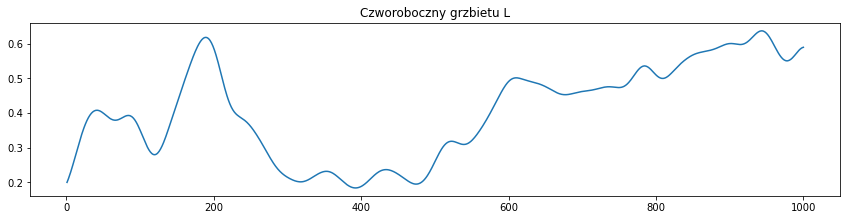

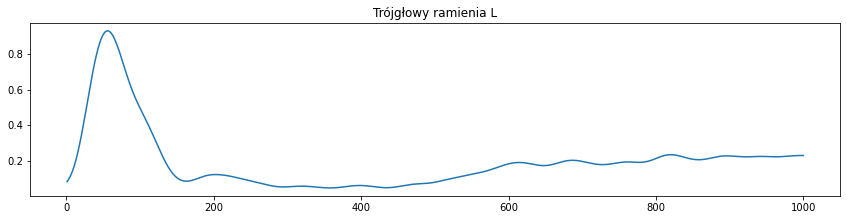

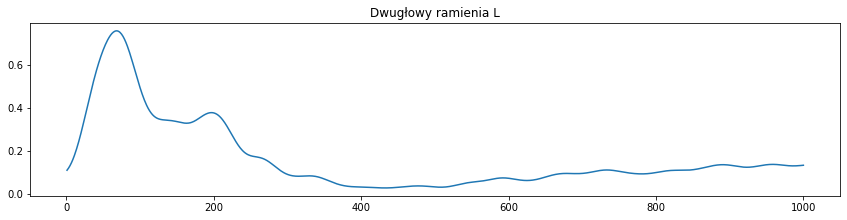

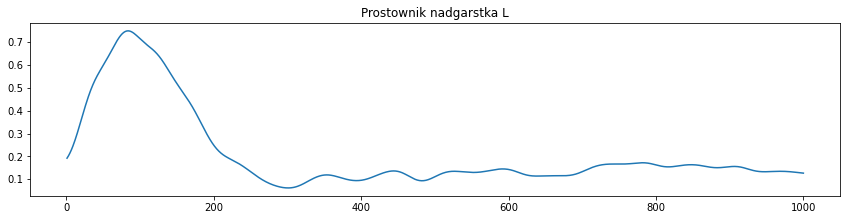

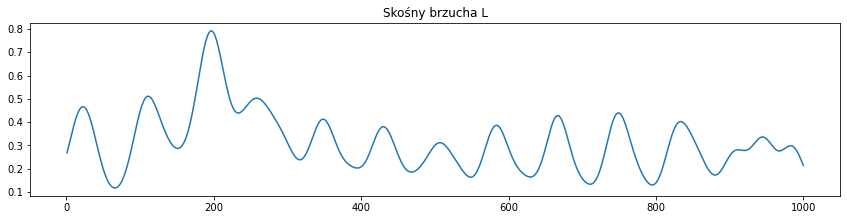

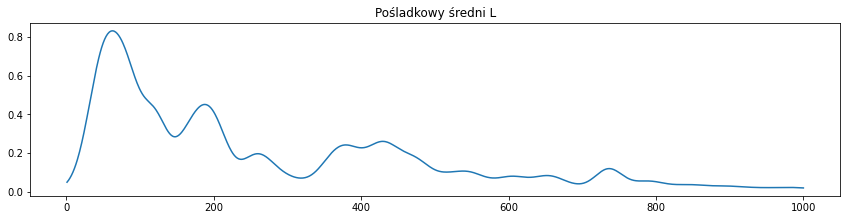

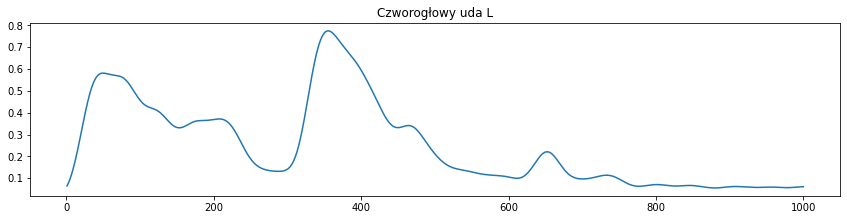

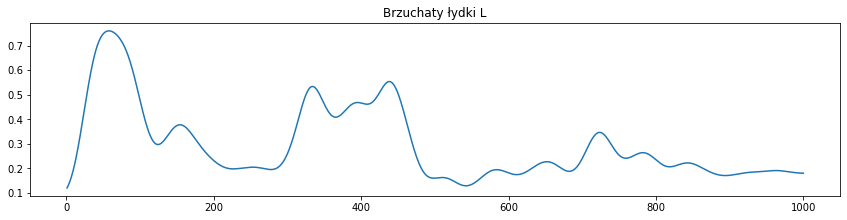

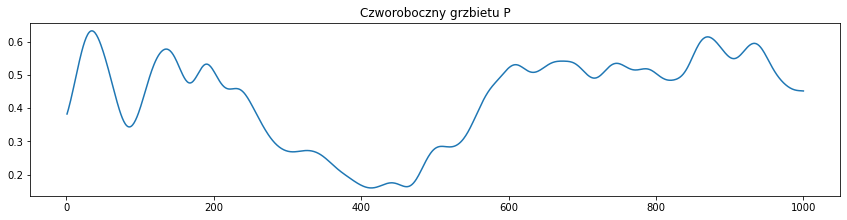

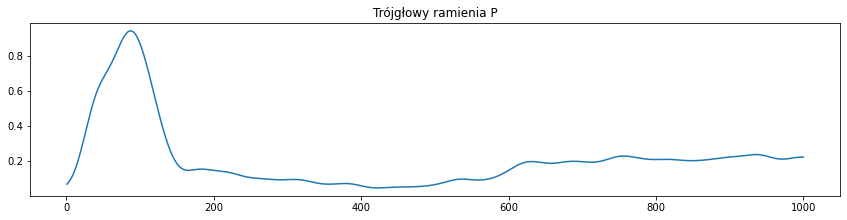

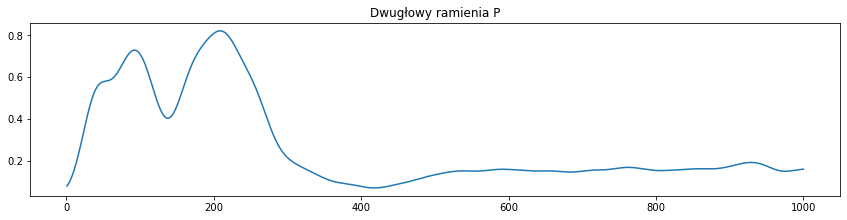

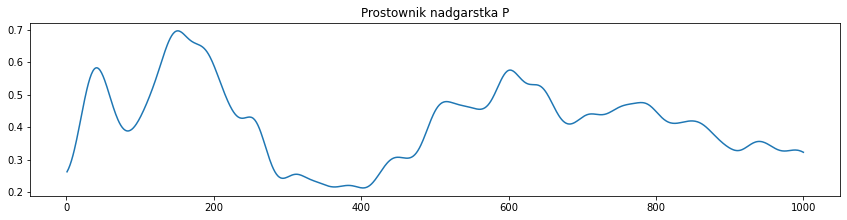

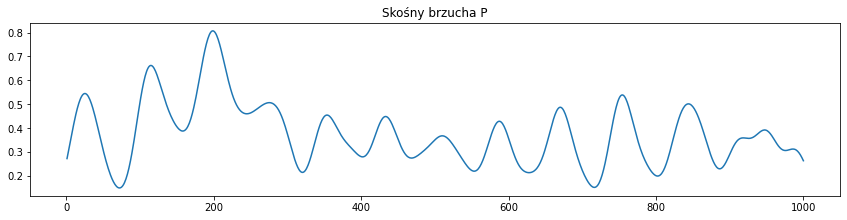

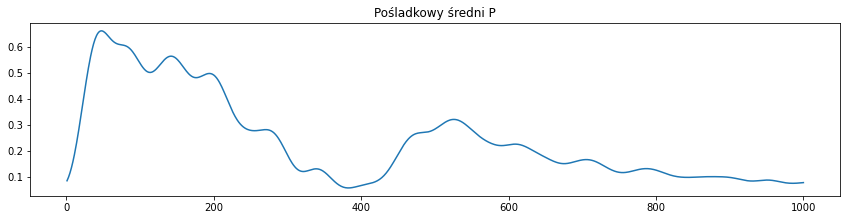

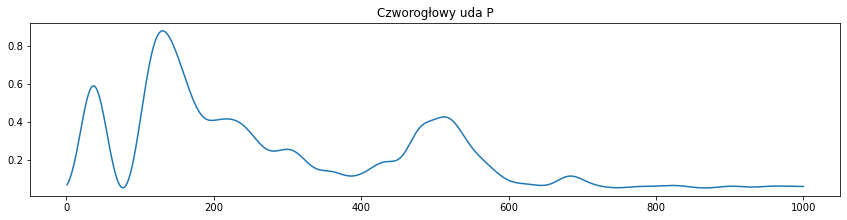

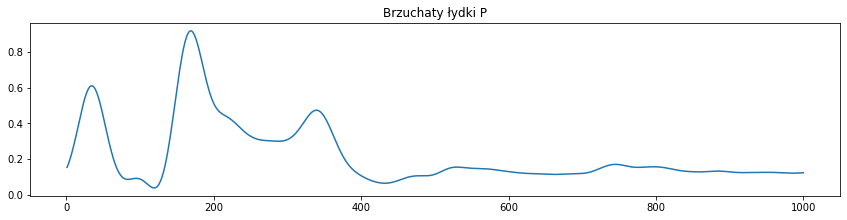

In [49]:
folder_path2=r"Z:\Miecz\\"
# print(np.diff(processed[1][1:2]))
compare_events_average_shifted(folder_path2,"B0446", "2")

In [55]:
def show_events_norm_shifted(data_path):

    emg_processed = emg_full_preproces(data_path)
        
    muscles_names2 = ["Czworoboczny grzbietu L","Trójgłowy ramienia L", "Dwugłowy ramienia L", "Prostownik nadgarstka L","Skośny brzucha L", "Pośladkowy średni L","Czworogłowy uda L", "Brzuchaty łydki L","Czworoboczny grzbietu P","Trójgłowy ramienia P", "Dwugłowy ramienia P", "Prostownik nadgarstka P","Skośny brzucha P", "Pośladkowy średni P","Czworogłowy uda P", "Brzuchaty łydki P"]
 
    p,d=dp.read_labels(data_path, 1000)
    for num in range(16):
        s,k=nowy_czas(p,d,emg_processed[num])
        print(p,d)
        print(s,k)
        subplot(1, 2, 1)
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2.8, 
                    top=0.9, 
                    wspace=0.25, 
                    hspace=0.35)
        
        for i in range(len(p)):
        
                   
            emg_processed_event=emg_processed[num][(p[i]+s[i].astype(int)):(d[i]+k[i].astype(int))]
            emg_processed_event2 = (
            emg_processed_event.meca.normalize(scale=1)                
     )
            time_normalized=emg_processed_event2.meca.time_normalize(n_frames=1000)
            plt.plot(time_normalized)     
            plt.title(muscles_names2[num])

        subplot(1, 2, 2)
        plt.plot(emg_processed[num])
        plt.title(muscles_names2[num])
        plt.show()

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[641.  86.  18.  57.  60. 130. 295. 188. 135.  95.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


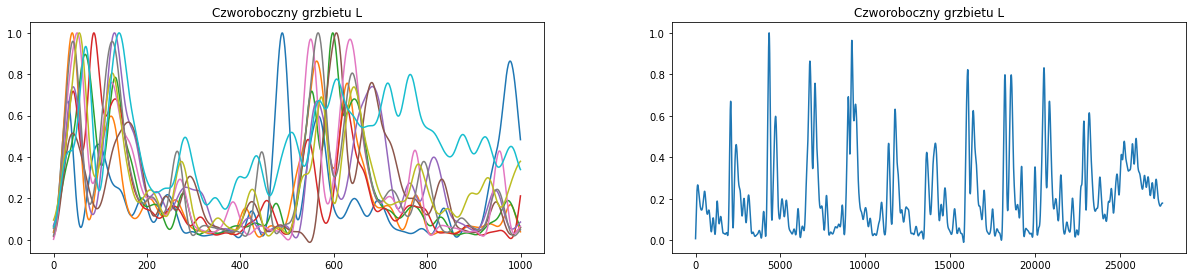

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[562. 226. 204. 201. 225. 124. 248. 290. 213. 331.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


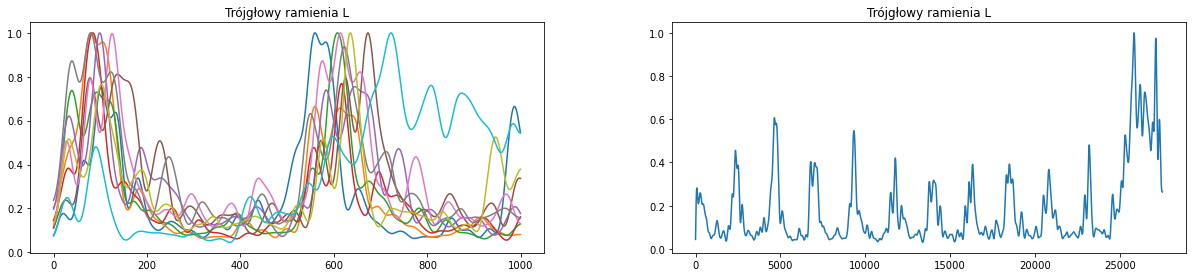

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[300.  88. 153. 105. 120.  89.  26.   0.  84. 117.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2315. 2259.]


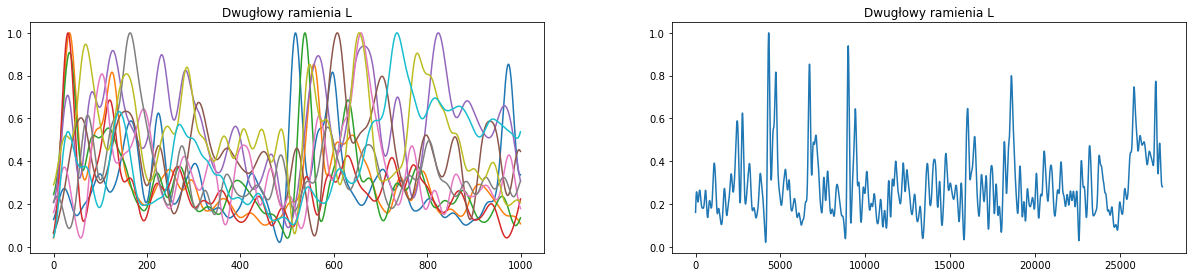

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[238.  84.   0.  89. 176.  97. 349. 166.   0. 200.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


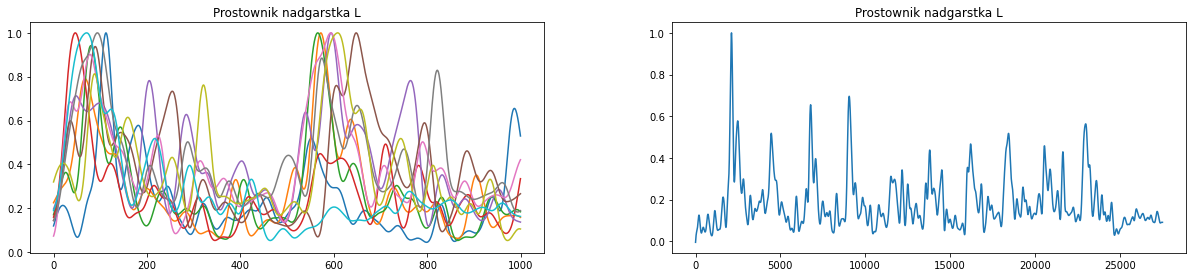

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[743. 445. 245. 267. 130. 338. 332. 180. 635. 533.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


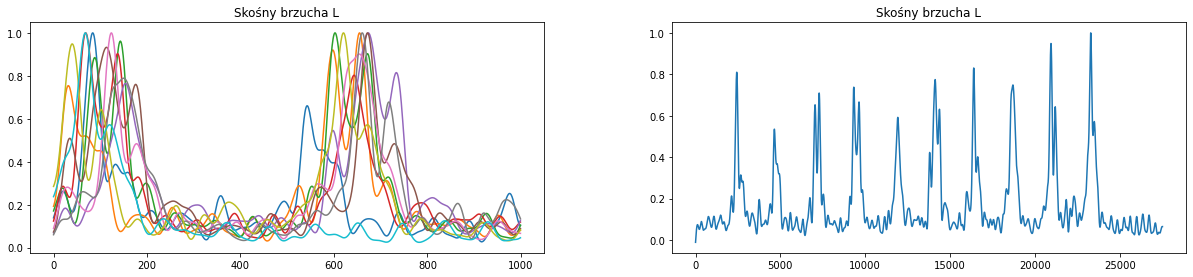

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[428.   0.   0.   0.   0.  76. 155.  56.  15.   0.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


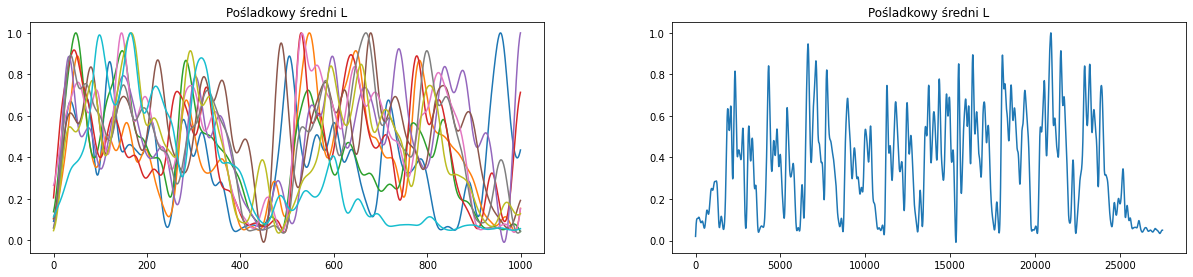

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[339. 157.   0.   0. 120.  34. 130.   0.   0.   0.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


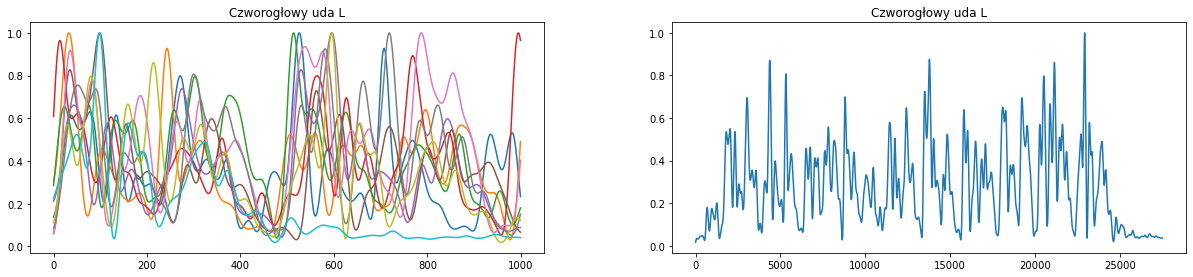

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[204.   0.  20.   0.  49.  93. 200.  53.  37.  54.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


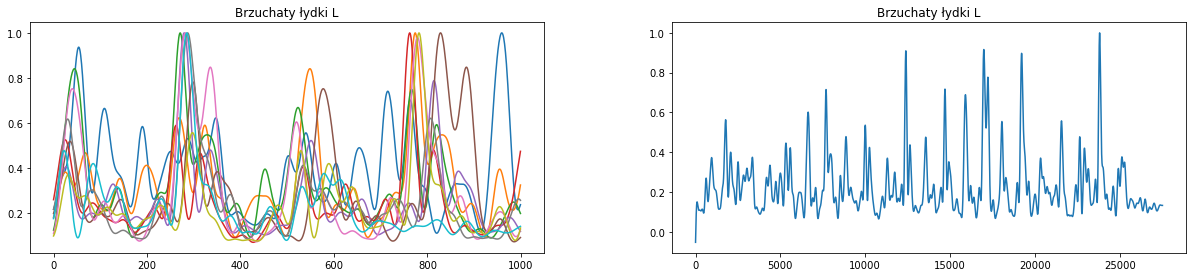

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[635. 117.  24. 124.  78. 111. 350. 248. 181. 297.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


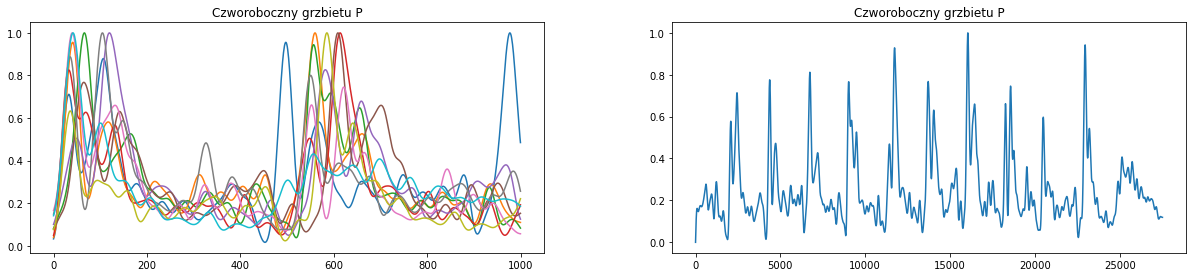

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[510. 132. 325. 103. 274. 437. 250. 383. 327. 541.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


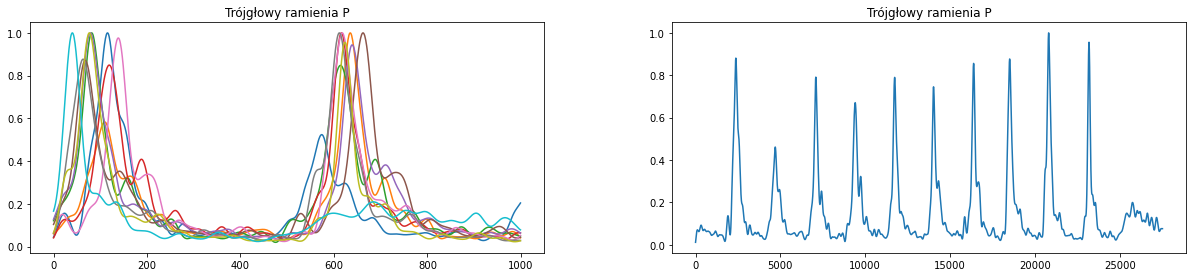

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[580. 437. 229. 147.   0. 718. 359. 192. 289. 494.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


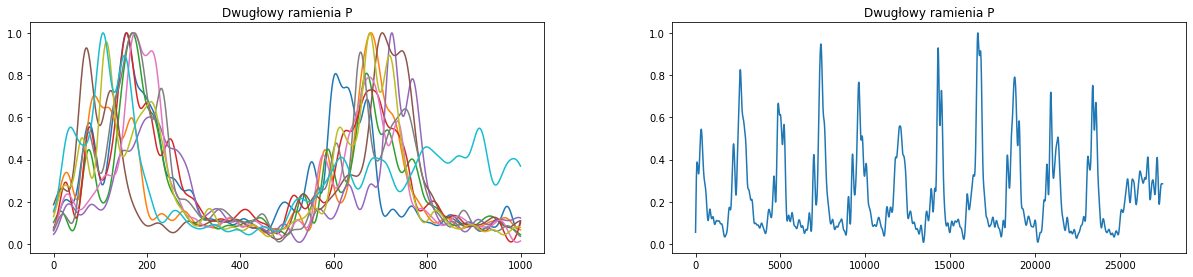

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[ 88. 204. 288.   0. 181. 257.   0. 366. 284. 167.] [2784. 2339. 2339. 2389. 2164. 2204. 2339. 2284. 2334. 2259.]


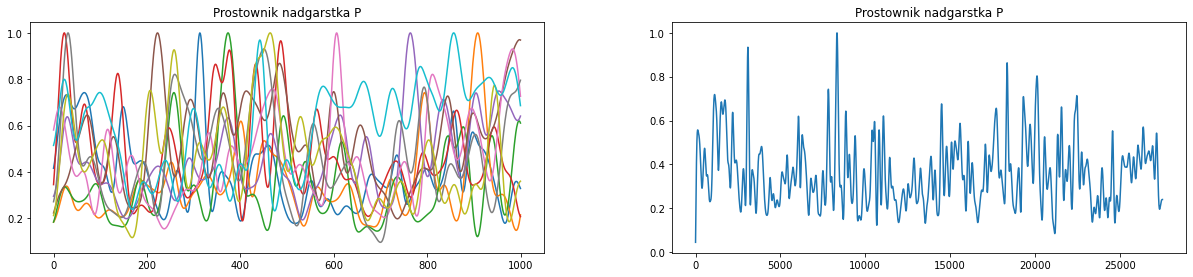

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[ 87.   1.  58.  28.   0.   0.   0. 164.   0.  36.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


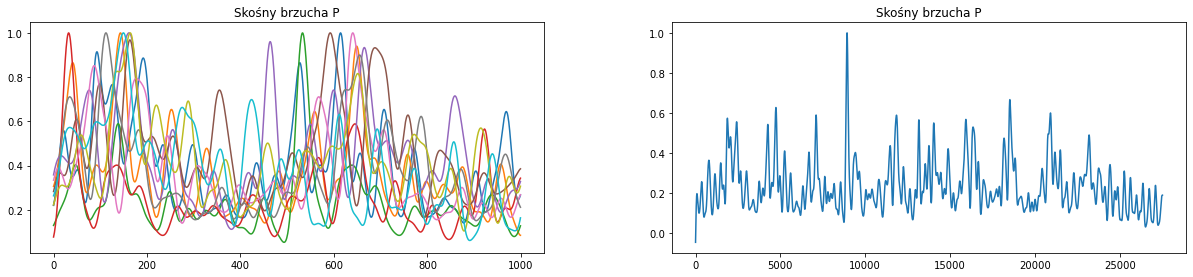

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[  0. 101.  82.  71. 118. 183. 292. 214. 150. 294.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


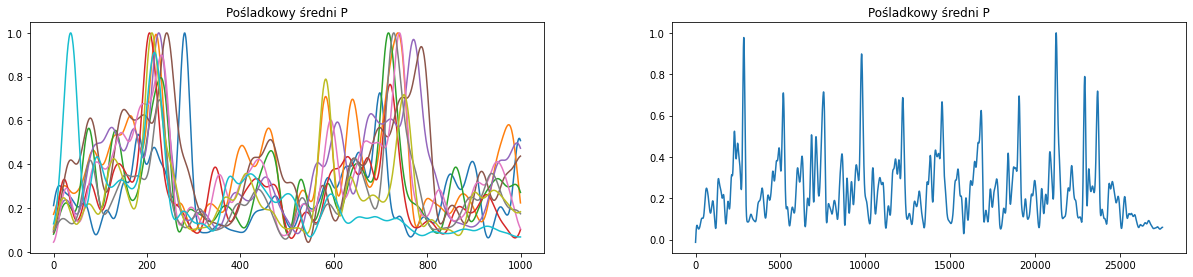

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[ 41.  70.  48.  38.  88. 119. 266. 147. 135. 111.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


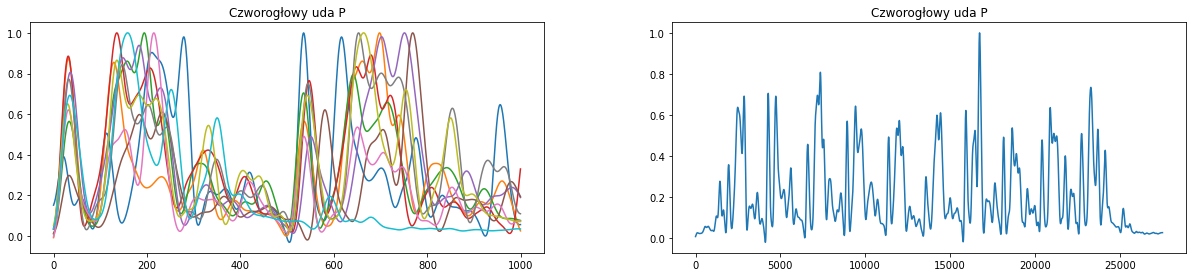

[1280, 4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480] [4065, 6405, 8745, 11135, 13315, 15520, 17860, 20145, 22480, 24740]
[289.   0. 136. 235.   0.   0. 125.   1.   0.   0.] [2784. 2339. 2339. 2389. 2179. 2204. 2339. 2284. 2334. 2259.]


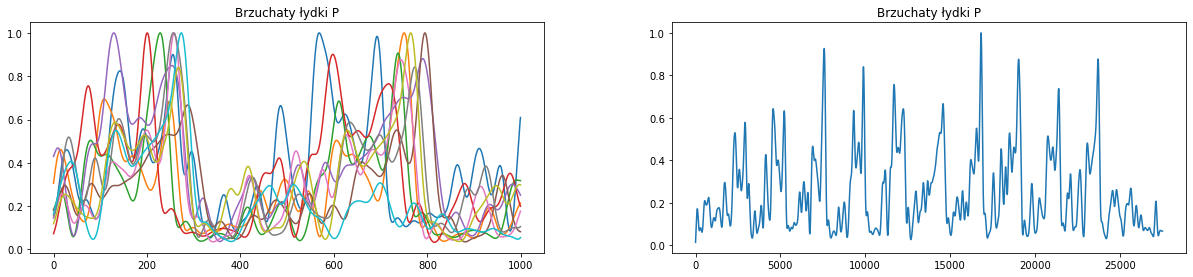

In [56]:
show_events_norm_shifted(datapath_fullmove)